# Information Gain - Mutual Information in Regression Problem Statements

In [1]:
import pandas as pd
df=pd.read_csv('Houseprice.csv')

In [2]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info() # we will be taking only the integer and float.info()  we have to do different types of encoding techniques 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# we are going to findout the best features based on the sales price 
#Sale Price is continuous target variable
df.isnull().sum() # how many null values are there

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# we will be taking only the numerical value
numeric_lst=['int64','float64']
numerical_cols=list(df.select_dtypes(include=numeric_lst).columns) #whereever these datatypes matches the list

In [6]:
numerical_cols # we are choosing these columns
# Find the MI of the I/P features with sales price (O/P) 

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
df=df[numerical_cols]

In [8]:
df # check column difference

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
# drop id column
df=df.drop('Id',axis=1)

In [10]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
#train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    df.drop('SalePrice',axis=1),     #independet features
    df['SalePrice'],                   #dependent features
    test_size=0.3,
    random_state=0)  
x_train.shape, x_test.shape

((1022, 36), (438, 36))

In [12]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [13]:
x_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
529,20,NaN,32668,6,3,1957,1975,NaN,1219,0,...,484,0,0,200,0,0,0,0,3,2007
491,50,79.0,9490,6,7,1941,1950,0.0,403,165,...,240,0,0,32,0,0,0,0,8,2006
459,50,NaN,7015,5,4,1950,1950,161.0,185,0,...,352,0,0,248,0,0,0,0,7,2009
279,60,83.0,10005,7,5,1977,1977,299.0,392,0,...,505,288,117,0,0,0,0,0,3,2008
655,160,21.0,1680,6,5,1971,1971,381.0,0,0,...,264,0,0,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,20,73.0,39104,7,7,1954,2005,0.0,226,1063,...,439,81,0,0,0,0,0,0,4,2008
445,20,73.0,9855,6,5,1956,1956,0.0,0,0,...,480,0,0,0,0,0,0,0,11,2009
654,20,91.0,10437,8,6,1995,1995,660.0,1696,0,...,839,236,46,0,0,0,0,0,8,2008
1280,20,67.0,9808,7,5,2002,2002,110.0,788,0,...,544,0,72,0,0,0,0,0,3,2009


In [14]:
# Check whether x train have any null value or not
x_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [16]:
from sklearn.feature_selection import mutual_info_regression
# Determine the mutual information
mutual_info=mutual_info_regression(x_train.fillna(0),y_train)
mutual_info
# [ fillna(0) ]  -  fill some values for the na
# all the value will be greater than zero and less than 1

array([0.25996549, 0.20593566, 0.16526669, 0.55382504, 0.12280937,
       0.35082386, 0.2456163 , 0.10354049, 0.16048269, 0.01033982,
       0.10907621, 0.38604317, 0.31218509, 0.22325902, 0.01230908,
       0.48532358, 0.02479187, 0.        , 0.28184013, 0.07587933,
       0.05627455, 0.00951555, 0.18038778, 0.1882604 , 0.26939615,
       0.37151076, 0.36571331, 0.06957761, 0.17048638, 0.01069916,
       0.        , 0.01452947, 0.        , 0.        , 0.        ,
       0.00423739])

In [17]:
# Getting feature name along with IG along with it
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns  # index= column name
mutual_info.sort_values(ascending=False)

OverallQual      0.553825
GrLivArea        0.485324
TotalBsmtSF      0.386043
GarageCars       0.371511
GarageArea       0.365713
YearBuilt        0.350824
1stFlrSF         0.312185
FullBath         0.281840
GarageYrBlt      0.269396
MSSubClass       0.259965
YearRemodAdd     0.245616
2ndFlrSF         0.223259
LotFrontage      0.205936
Fireplaces       0.188260
TotRmsAbvGrd     0.180388
OpenPorchSF      0.170486
LotArea          0.165267
BsmtFinSF1       0.160483
OverallCond      0.122809
BsmtUnfSF        0.109076
MasVnrArea       0.103540
HalfBath         0.075879
WoodDeckSF       0.069578
BedroomAbvGr     0.056275
BsmtFullBath     0.024792
ScreenPorch      0.014529
LowQualFinSF     0.012309
EnclosedPorch    0.010699
BsmtFinSF2       0.010340
KitchenAbvGr     0.009516
YrSold           0.004237
BsmtHalfBath     0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<Axes: >

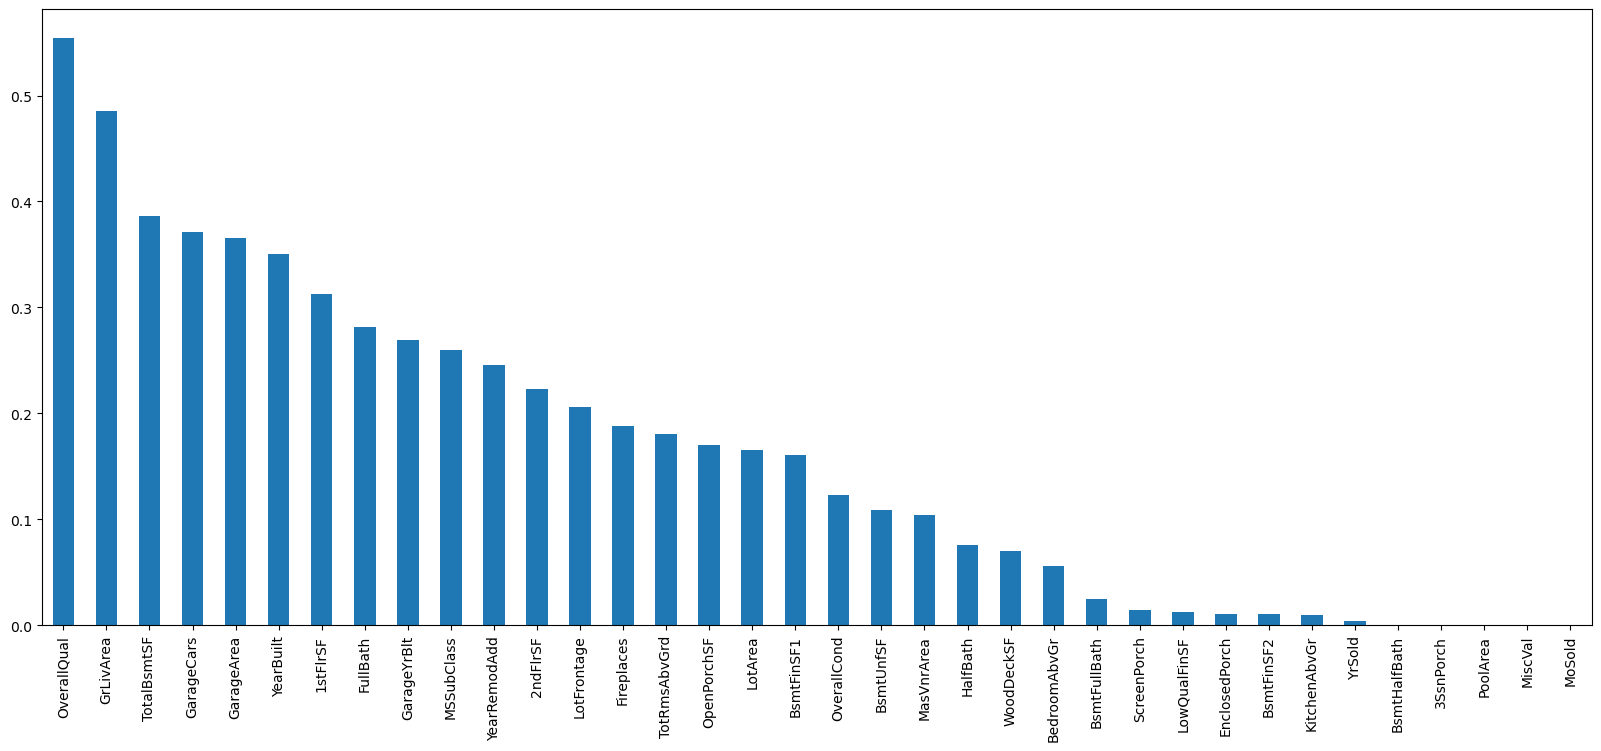

In [18]:
# Lets Plot a bar graph
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [21]:
sel_five_cols.get_support() # check the "true " only whichever will be in the top 20 percentile

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [19]:
# We are going to take the top best features based on information gain value
from sklearn.feature_selection import SelectPercentile
# So we will select the top  important features
sel_five_cols=SelectPercentile(mutual_info_regression,percentile=20)
sel_five_cols.fit(x_train.fillna(0),y_train)
#sel_five_cols.fit(x_train.fillna(0),y_train)- if we are having some null values
x_train.columns[sel_five_cols.get_support()]
# get_support() - gives us the index
# mutual_info_regression-  calculate the MI between dependent and independent features
# these are the top 20 percentile data
# That means 80% of the entire population are having dependency less than the 'GarageArea'

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')